# Import Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

# Import Data

In [3]:
airline=pd.read_excel('C:\\Users\\user\\Downloads\\Airlines+Data.xlsx')
airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


# Data Understanding

In [4]:
airline.shape

(96, 2)

In [5]:
airline.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [6]:
airline.isna().sum()

Month         0
Passengers    0
dtype: int64

In [7]:
airline_1=pd.read_excel('C:\\Users\\user\\Downloads\\Airlines+Data.xlsx',index_col=0,parse_dates=True)
airline_1

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [8]:
airline_1.dtypes

Passengers    int64
dtype: object

# Visualization

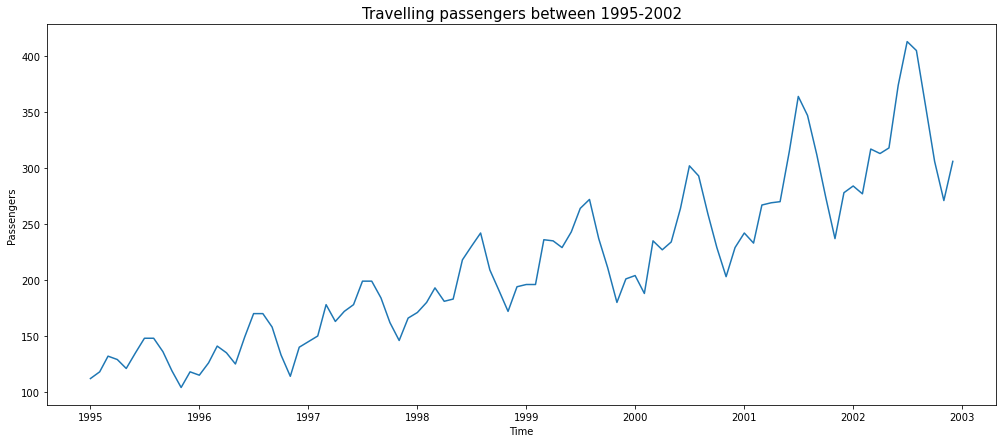

In [9]:
plt.figure(figsize=(17,7))
plt.plot(airline_1['Passengers'])
plt.title('Travelling passengers between 1995-2002',size=15)
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.show()

In [10]:
resample_airline=airline_1.resample('D').mean()
resample_airline

,Passengers
Month,
1995-01-01,112.0
1995-01-02,NaN
1995-01-03,NaN
1995-01-04,NaN
1995-01-05,NaN
...,...
2002-11-27,NaN
2002-11-28,NaN
2002-11-29,NaN


In [11]:
resample_airline.dtypes

Passengers    float64
dtype: object

In [12]:
resample_airline_interpolated=resample_airline.interpolate(method='linear')
resample_airline_interpolated

,Passengers
Month,
1995-01-01,112.000000
1995-01-02,112.193548
1995-01-03,112.387097
1995-01-04,112.580645
1995-01-05,112.774194
...,...
2002-11-27,301.333333
2002-11-28,302.500000
2002-11-29,303.666667


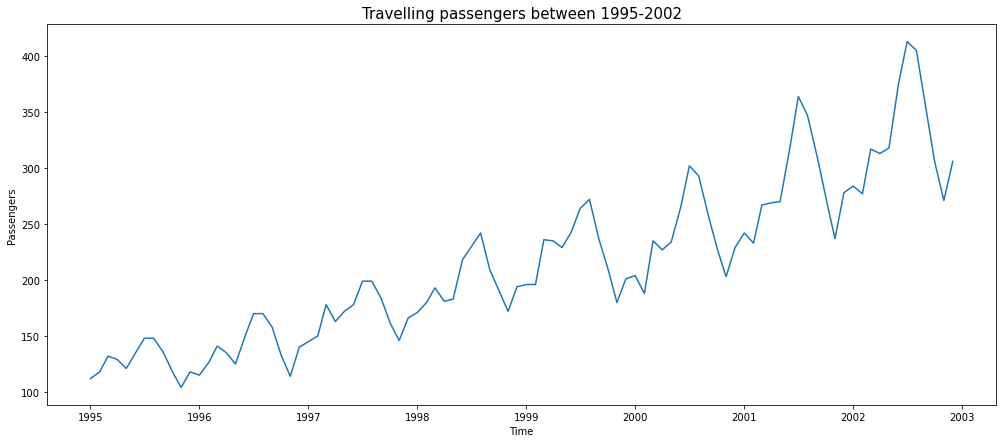

In [13]:
plt.figure(figsize=(17,7))
plt.plot(resample_airline_interpolated['Passengers'])
plt.title('Travelling passengers between 1995-2002',size=15)
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.show()

# Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
airline.iloc[:,1]

0     112
1     118
2     132
3     129
4     121
     ... 
91    405
92    355
93    306
94    271
95    306
Name: Passengers, Length: 96, dtype: int64

# Model Building

In [17]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(airline.iloc[:,1:])

In [18]:
df

array([[0.02588997],
       [0.04530744],
       [0.09061489],
       [0.08090615],
       [0.05501618],
       [0.10032362],
       [0.14239482],
       [0.14239482],
       [0.10355987],
       [0.04854369],
       [0.        ],
       [0.04530744],
       [0.03559871],
       [0.07119741],
       [0.1197411 ],
       [0.10032362],
       [0.06796117],
       [0.14563107],
       [0.21359223],
       [0.21359223],
       [0.17475728],
       [0.09385113],
       [0.03236246],
       [0.11650485],
       [0.13268608],
       [0.14886731],
       [0.2394822 ],
       [0.19093851],
       [0.22006472],
       [0.2394822 ],
       [0.30744337],
       [0.30744337],
       [0.25889968],
       [0.18770227],
       [0.13592233],
       [0.20064725],
       [0.21682848],
       [0.24595469],
       [0.28802589],
       [0.24919094],
       [0.25566343],
       [0.36893204],
       [0.40776699],
       [0.44660194],
       [0.33980583],
       [0.2815534 ],
       [0.22006472],
       [0.291

# Model Training||Model Evaluation

In [19]:
##splitting dataset into train and test split
training_size=int(len(df)*0.65)

In [20]:
training_size

62

In [21]:
test_size=len(df)-training_size

In [22]:
test_size

34

In [23]:
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [25]:
train_data

array([[0.02588997],
       [0.04530744],
       [0.09061489],
       [0.08090615],
       [0.05501618],
       [0.10032362],
       [0.14239482],
       [0.14239482],
       [0.10355987],
       [0.04854369],
       [0.        ],
       [0.04530744],
       [0.03559871],
       [0.07119741],
       [0.1197411 ],
       [0.10032362],
       [0.06796117],
       [0.14563107],
       [0.21359223],
       [0.21359223],
       [0.17475728],
       [0.09385113],
       [0.03236246],
       [0.11650485],
       [0.13268608],
       [0.14886731],
       [0.2394822 ],
       [0.19093851],
       [0.22006472],
       [0.2394822 ],
       [0.30744337],
       [0.30744337],
       [0.25889968],
       [0.18770227],
       [0.13592233],
       [0.20064725],
       [0.21682848],
       [0.24595469],
       [0.28802589],
       [0.24919094],
       [0.25566343],
       [0.36893204],
       [0.40776699],
       [0.44660194],
       [0.33980583],
       [0.2815534 ],
       [0.22006472],
       [0.291

In [26]:
test_data

array([[0.42394822],
       [0.39805825],
       [0.42071197],
       [0.51779935],
       [0.6407767 ],
       [0.61165049],
       [0.50161812],
       [0.40453074],
       [0.32038835],
       [0.40453074],
       [0.44660194],
       [0.41747573],
       [0.52750809],
       [0.53398058],
       [0.53721683],
       [0.6828479 ],
       [0.84142395],
       [0.78640777],
       [0.67313916],
       [0.55016181],
       [0.43042071],
       [0.5631068 ],
       [0.58252427],
       [0.55987055],
       [0.68932039],
       [0.6763754 ],
       [0.69255663],
       [0.87378641],
       [1.        ],
       [0.97411003],
       [0.81229773],
       [0.65372168],
       [0.54045307],
       [0.65372168]])

In [29]:
import numpy as np
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [30]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:
X_train.shape, y_train.shape

((57, 4), (57,))

In [34]:
import numpy as np
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)




**LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library**.

In [35]:
X_train.shape

(57, 4, 1)

## Using Keras

In [36]:
## Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [37]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
57/57 [==============================] - 4s 17ms/step - loss: 0.0184 - val_loss: 0.0459
Epoch 2/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0092 - val_loss: 0.0364
Epoch 3/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.0616
Epoch 4/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0102 - val_loss: 0.0483
Epoch 5/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.0355
Epoch 6/100
57/57 [==============================] - 0s 9ms/step - loss: 0.0082 - val_loss: 0.0406
Epoch 7/100
57/57 [==============================] - 0s 9ms/step - loss: 0.0080 - val_loss: 0.0342
Epoch 8/100
57/57 [==============================] - 1s 10ms/step - loss: 0.0073 - val_loss: 0.0340
Epoch 9/100
57/57 [==============================] - 0s 6ms/step - loss: 0.0071 - val_loss: 0.0422
Epoch 10/100
57/57 [==============================] - 0s 6ms/step - loss: 0.0070 - val_loss: 0.0408
Epoch 1

Epoch 83/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0155
Epoch 84/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0108
Epoch 85/100
57/57 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.0097
Epoch 86/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0243
Epoch 87/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0213
Epoch 88/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0141
Epoch 89/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0161
Epoch 90/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0170
Epoch 91/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0099
Epoch 92/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0160


In [38]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [39]:
test_predict

array([[0.51984096],
       [0.61739147],
       [0.48306933],
       [0.35426605],
       [0.33799875],
       [0.305795  ],
       [0.4368875 ],
       [0.45078292],
       [0.3610924 ],
       [0.51801634],
       [0.4857421 ],
       [0.45130956],
       [0.6528536 ],
       [0.7751174 ],
       [0.5462127 ],
       [0.43078282],
       [0.41744116],
       [0.3645467 ],
       [0.585812  ],
       [0.551798  ],
       [0.44409806],
       [0.64064586],
       [0.56337225],
       [0.5410377 ],
       [0.7948582 ],
       [0.83172345],
       [0.641837  ],
       [0.47267306],
       [0.4400582 ]], dtype=float32)

In [41]:
y_train.shape,train_predict.shape

((57,), (57, 1))

In [44]:
train_predict

array([[0.10050984],
       [0.08021839],
       [0.13604915],
       [0.1688482 ],
       [0.15818456],
       [0.1200354 ],
       [0.07668021],
       [0.03940263],
       [0.08765066],
       [0.06063428],
       [0.10137694],
       [0.14690429],
       [0.11594961],
       [0.09192186],
       [0.18508783],
       [0.24032508],
       [0.21767312],
       [0.17816862],
       [0.10952199],
       [0.07049549],
       [0.16468449],
       [0.15415943],
       [0.16746604],
       [0.27144244],
       [0.18689497],
       [0.23825075],
       [0.26052266],
       [0.32744104],
       [0.30251548],
       [0.24074206],
       [0.1888278 ],
       [0.16079965],
       [0.24415122],
       [0.23645194],
       [0.25844365],
       [0.30309594],
       [0.23977815],
       [0.26442194],
       [0.4051759 ],
       [0.40247273],
       [0.41466123],
       [0.2733924 ],
       [0.26196545],
       [0.23444653],
       [0.32863858],
       [0.3073543 ],
       [0.29028758],
       [0.455

In [45]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.051449261930503074

In [46]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))



0.13668632530725233

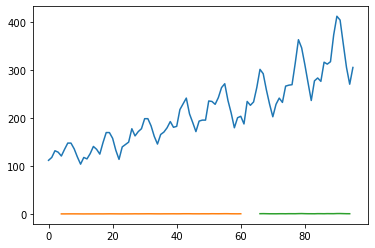

In [47]:
### Plotting 
# shift train predictions for plotting
look_back=4
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()